In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
#This binning with the error calculated in this way is not good if the input data has too few point. 
# For example, if nbins=size(x), error will be 0.
def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    #nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y) [0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)/np.sqrt(n)
    
    return meanx,meany,std_y #putput: nbins rows, 3 col

def log_binning(x,y,nbins):
    nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    max_x = np.log10(max(x))
    min_x = np.log10(min(x))
    bins = np.logspace(min_x,max_x,num=nbins)
    # Based off of: http://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
    bin_no_pts= np.histogram(x, bins)[0] #the no fo data points in every bin
    #print "binning schem:";print bin_no_pts
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / bin_no_pts)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / bin_no_pts)   
    bin_means_yy = (np.histogram(x,bins,weights=y*y)[0] / bin_no_pts)
    bin_std_y = np.sqrt( bin_means_yy - bin_means_y*bin_means_y)/np.sqrt(bin_no_pts)   

    return bin_means_x,bin_means_y,bin_std_y # output: nbins-rows, 3 cols
figsz=(6.5,5) #fig size
legfs=18 #legend fontsize
axfs=16 # axis label fontsize
tickfs=15# ticklabel fontsize
texfs=16 # annotante/tex fontsize
titfs=18# title fontsize


In [2]:
#1st ZF_1.55-300K
fpath11='D:/4_muonSR/data_plot/GPS_ZF_13Ts_1p5-300k_StreExp_100bin_9us_TAB.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter="\t")

In [3]:
#1st ZF_1.55-300K
#here input the parameters
#####################
datasets    =13 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10,11,12)) #plot which datasets
plotNo      =np.array((0,2,4,9,10,11)) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value
####################

dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

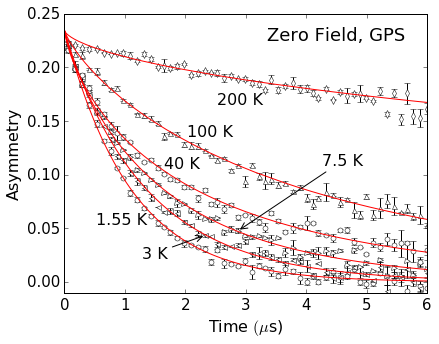

In [5]:
#1st ZF_1.55-300K
#plot data
#here input the parameters
#%matplotlib qt
#####################
plt.figure(figsize=figsz)
fig_label=("1.55K","2.3K","3K","5.2K","7.5K","10K","16K","21K","32K","42K","100K","200K","300K")
tex_pos=np.array([0,0.02,0.04,0.06,0.08,0.17])
markers=("o","<",">","o","^","d")
mkfaceCor=("red","black","blue","green","orange")
#####################
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    plt.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    plt.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],color='black', fmt=markers[i],markersize='5', mfc='white', zorder=1)
#for idx, i in enumerate(plotNo):
    #ax=plt.gca()
    #ax.annotate(fig_label[i], xy=(1, 0),fontsize=16, xytext=(0, -15),arrowprops=dict(facecolor='black', shrink=0.05), textcoords='offset points',ha='right', va='top')
    #plt.text(6.4,tex_pos[idx] ,fig_label[i],size=15, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white',alpha=1, edgecolor='white', boxstyle='round'))

ax=plt.gca() 
ax1=ax.annotate("3 K", xy=(dat[1,20,0],dat[1,20,1]),fontsize=texfs, xytext=(1.5, 0.02),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='bottom')
an2=ax.annotate("7.5 K", xy=(dat[2,25,0],dat[2,25,1]),fontsize=texfs, xytext=(4.6, 0.12),arrowprops=dict(arrowstyle="->",facecolor='black'),ha='center', va='top')
plt.text(4.5, 0.23,'Zero Field, GPS',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))
plt.text(0.95, 0.058,'1.55 K',size=texfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
plt.text(2.9, 0.17,'200 K',size=texfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
plt.text(2.4, 0.14,'100 K',size=texfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
plt.text(1.95, 0.11,'40 K',size=texfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

#plt.xscale('log')
#plt.legend()
plt.xlim(0., 6)
plt.ylim(-0.01, 0.25)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

###this block set the grid
#ax=plt.gca() # get the fig axis
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.grid(b=True,which='both', color='black', linestyle='--',zorder=0)
#an1.draggable()
#an2.draggable()
plt.savefig("D:/4_muonSR/data_plot/GPS_ZF_6Ts.eps", bbox_inches="tight",verbose=True)
plt.show()

In [26]:
##2nd 500Gs_1.55-300K
fpath11='D:/4_muonSR/data_plot/GPS_500G_12Ts_1p5-300k_StreExp_100bin_9us.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")

In [27]:
##2nd 500Gs_1.55-300K
#here input the parameters
#####################
datasets    =12 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10,11)) #plot which datasets
plotNo      =np.array((0,9,10,11)) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value
####################

dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

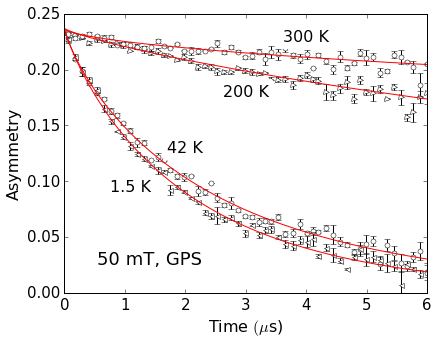

In [28]:
##2nd 500Gs_1.55-300K
#plot data
#here input the parameters
#####################
plt.figure(figsize=figsz)
fig_label=("1.5 K","2.3 K","3 K","5.2 K","7.5 K","10 K","16 K","21 K","32 K","42 K","200 K","300 K")
tex_pos=np.array([[1.1,2,3,4,0.5,0.58],[0.095,0.13,0.18,0.23,0.5,0.58]])
markers=("o","<",">","o","d","^")
mkfaceCor=("red","black","blue","green","orange")
#####################
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    plt.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    plt.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],color='black', fmt=markers[ii],markersize='5', mfc='white', zorder=1)
for idx, i in enumerate(plotNo):
    plt.text(tex_pos[0,idx],tex_pos[1,idx] ,fig_label[i],size=texfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white',alpha=1, edgecolor='white', boxstyle='round'))

plt.text(1.4, 0.03,'50 mT, GPS',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.xscale('log')
#plt.legend()
plt.xlim(0., 6)
plt.ylim(0, 0.25)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

ax=plt.gca() # get the fig axis
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.grid(b=True,which='both', color='black', linestyle='--',zorder=0)
plt.savefig("D:/4_muonSR/data_plot/GPS_500Gs_4Temps.eps", bbox_inches="tight",verbose=True)  
plt.show()

In [29]:
#1st ZF_1.55-300K
fpath11='D:/4_muonSR/data_plot/GPS_11Fields0-5kG_1p5k_StreExp_150bin_9us.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")

In [30]:
##2nd 500Gs_1.55-300K
#here input the parameters
#####################
datasets    =11 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10)) #plot which datasets
plotNo      =np.array([0,1,3,4]) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =150 # how many binning points
shiftd      =0.0# shift data by a value
####################

dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

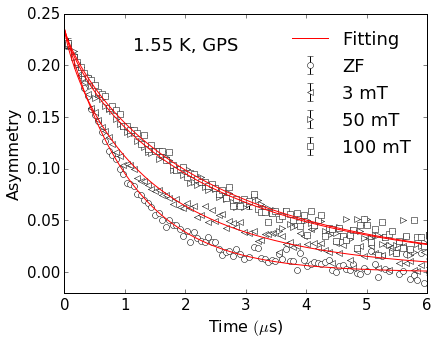

In [31]:
plt.figure(figsize=figsz)
fig_label=("ZF","3 mT","5 mT","50 mT","100 mT","130 mT","160 mT","200 mT","300 mT","400 mT","500 mT")
tex_pos=np.array([[1,2,3,4,0.5,0.58],[0.09,0.13,0.18,0.23,0.5,0.58]])
markers=("o","<",">","s","d")
mlcolor=("red","black","blue","green","orange")
#####################
###### This block plot colorful...
# for idx, i in enumerate(plotNo):
#     plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color=mlcolor[idx], fmt=markers[idx],markersize='6',mfc='white', mec=mlcolor[idx], zorder=1)
#     if idx==0:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=2,label='Fitting')
#     else:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color=mlcolor[idx],linewidth=2)
######
for idx, i in enumerate(plotNo):
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='black', fmt=markers[idx],markersize='6', mfc='white', zorder=1)
    if idx==0:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=1,label='Fitting')
    else:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=1) 

plt.text(2, 0.22,'1.55 K, GPS',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.xscale('log')
plt.xlim(0., 6)
plt.ylim(-0.02, 0.25)

#leg = plt.legend()
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(1)
leg = plt.legend(loc='best', numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
leg.get_frame().set_edgecolor('w')


plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
###this block set grid    
#ax=plt.gca() # get the fig axis
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.grid(b=True,which='both', color='black', linestyle='--',zorder=0)

plt.savefig("D:/4_muonSR/data_plot/GPS_1p55K_decoupling.eps", bbox_inches="tight",verbose=True)  
plt.show()

[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A612EF0>, <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6807F0>]


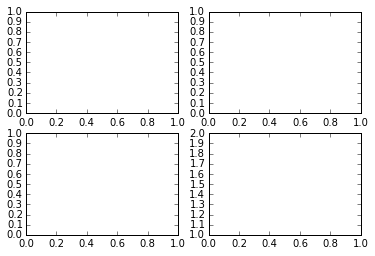

In [7]:
# http://stackoverflow.com/questions/24743410/strange-behavior-of-multiplelocator-with-subplots
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
fig, axes = plt.subplots(2, 2)
for ax in axes.flat:
    ax.yaxis.set(major_locator=MultipleLocator(0.1),
                 major_formatter=FormatStrFormatter('%2.1f'))
    ax.set_ylim(0, 1)

axes[-1, -1].set_ylim(1, 2)

fig.show()